In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# cab information 
cab_df = pd.read_csv("DataSets/Cab_Data.csv")
cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [12]:
#data types for cab_information 
cab_df.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [13]:
# city information 
city_df = pd.read_csv("DataSets/City.csv")
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [14]:
#city info data types 
city_df.dtypes

City          object
Population    object
Users         object
dtype: object

In [10]:
# customer information 
customer_df = pd.read_csv("DataSets/Customer_ID.csv")
customer_df

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [15]:
#customer info data types 
customer_df.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [11]:
#transaction information
transaction_df = pd.read_csv("DataSets/Transaction_ID.csv")
transaction_df


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [16]:
# transaction infor dtypes 
transaction_df.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

## Checking Missing Values then perform data imputation 

In [20]:
#check cab info df missing values 
for col in cab_df.columns:
    print(f"the missing values for column {col} is:  {cab_df[col].isna().sum()}")

the missing values for column Transaction ID is:  0
the missing values for column Date of Travel is:  0
the missing values for column Company is:  0
the missing values for column City is:  0
the missing values for column KM Travelled is:  0
the missing values for column Price Charged is:  0
the missing values for column Cost of Trip is:  0


In [21]:
# check city info df missing values
for col in city_df.columns:
    print(f"the missing values for column {col} is:  {city_df[col].isna().sum()}")

the missing values for column City is:  0
the missing values for column Population is:  0
the missing values for column Users is:  0


In [22]:
#check customer info df missing values 
for col in customer_df.columns:
    print(f"the missing values for column {col} is: {customer_df[col].isna().sum()}")

the missing values for column Customer ID is: 0
the missing values for column Gender is: 0
the missing values for column Age is: 0
the missing values for column Income (USD/Month) is: 0


In [23]:
#check transaction info df missing values
for col in transaction_df.columns:
    print(f"the missing values for column {col} is: {transaction_df[col].isna().sum()}")
    

the missing values for column Transaction ID is: 0
the missing values for column Customer ID is: 0
the missing values for column Payment_Mode is: 0


## Seems like there is no missing values. We are good to proceed 

## Finding💡:
### After carefull inspection, Transaction ID appears in both transaction df and cab df. Customer ID appears in both customer df and transaction df. Thus, we can potentially join transaction df, cab df and customer df together. 


In [24]:
# inner join transaction df and cab df on the attribute transaction ID 
full_df_intermediate = pd.merge(transaction_df,cab_df, on = "Transaction ID")
full_df_intermediate

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,Cash,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,53286,Cash,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,52265,Cash,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,52175,Card,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [25]:
# inner join the intermediate product from previous step to customer df on Customer ID
full_df = pd.merge(full_df_intermediate,customer_df,on ="Customer ID")
full_df

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417
359388,10439799,12490,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713
359389,10439838,41414,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960
359390,10439840,41677,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454


In [28]:
# we separate the pink cab company with yellow cab company to analyze their distribution individully 
pink_cab_df = full_df[full_df["Company"]=="Pink Cab"].reset_index(drop=True)
yellow_cab_df = full_df[full_df["Company"]=="Yellow Cab"].reset_index(drop=True)


In [29]:
pink_cab_df

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237
2,10395626,27703,Card,43400,Pink Cab,ATLANTA GA,13.39,167.03,141.934,Male,27,9237
3,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242
4,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327
...,...,...,...,...,...,...,...,...,...,...,...,...
84706,10437193,47760,Card,43105,Pink Cab,SACRAMENTO CA,31.03,436.06,344.433,Male,47,8823
84707,10437278,18620,Card,43102,Pink Cab,SAN DIEGO CA,26.73,343.83,304.722,Male,27,2876
84708,10437570,14974,Cash,43105,Pink Cab,SILICON VALLEY,22.23,386.13,264.537,Male,51,8020
84709,10437576,41135,Card,43105,Pink Cab,TUCSON AZ,35.96,461.77,381.176,Female,24,14269


In [30]:
yellow_cab_df

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813
1,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813
2,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237
3,10324737,27703,Cash,43224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,Male,27,9237
4,10079404,28712,Card,42634,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,Male,53,11242
...,...,...,...,...,...,...,...,...,...,...,...,...
274676,10439790,38520,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417
274677,10439799,12490,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713
274678,10439838,41414,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960
274679,10439840,41677,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454


In [31]:
print(f"the number of records related pink cab company is {len(pink_cab_df)}")
print(f"the number of records related yellow cab company is {len(yellow_cab_df)}")

the number of records related pink cab company is 84711
the number of records related yellow cab company is 274681


## right off the bat we realized that the number of obersevations for the two cab company is very different. yellow cab company has way more records compare to pink cab company.

# Hypothesis 

## <span style="color:red">Hypothesis 1: the customers' age distribution might be different for pink cab company and yellow cab company<span style="color:red">. 

In [82]:
## find out the age distribution for pink cab company
pink_unique_customer_df = pink_cab_df[["Age","Customer ID"]].drop_duplicates().reset_index(drop=True)
pink_age_count = list(pink_unique_customer_df.groupby(["Age"])["Age"].count())
pink_age = list(pink_unique_customer_df.groupby(["Age"])["Age"].count().index)

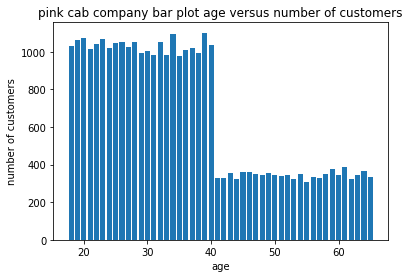

In [83]:
plt.bar(pink_age,pink_age_count)
plt.xlabel("age")
plt.ylabel("number of customers")
plt.title("pink cab company bar plot age versus number of customers")
plt.show()

In [84]:
## find out the age distribution for yellow cab company 
yellow_unique_customer_df = yellow_cab_df[["Age","Customer ID"]].drop_duplicates().reset_index(drop=True)
yellow_age_count = list(yellow_unique_customer_df.groupby(["Age"])["Age"].count())
yellow_age = list(yellow_cab_df.groupby(["Age"])["Age"].count().index)

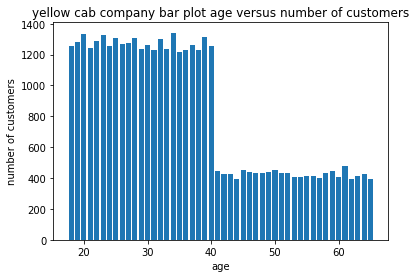

In [85]:
plt.bar(yellow_age,yellow_age_count)
plt.xlabel("age")
plt.ylabel("number of customers")
plt.title("yellow cab company bar plot age versus number of customers")
plt.show()

### Result: from the bar plot we can see that the distribution of age and number of customer distribution is very similar. we can see there is a drastic drop for number of customers at age 40 most of their customers have age between 18-40 years old 

## <span style="color:red">Hypothesis 2: male and female customer distribution are different between those two cab companies <span style="color:red">. 

In [104]:
## discover the gender distribution of pink cab company 
pink_unique_customer_df = pink_cab_df[["Customer ID","Gender"]].drop_duplicates().reset_index(drop=True)
pink_gender_count = list(pink_unique_customer_df.groupby(["Gender"])["Gender"].count())
pink_gender = list(pink_unique_customer_df.groupby(["Gender"])["Gender"].count().index)


In [105]:
pink_gender_count

[14819, 17511]

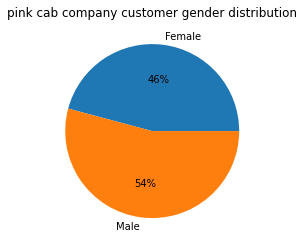

In [106]:
plt.pie(pink_gender_count,labels =pink_gender,autopct='%.0f%%')
plt.title("pink cab company customer gender distribution")
plt.show()

In [108]:
## discover the gender distribution of yellow cab company 
yellow_unique_customer_df = yellow_cab_df[["Customer ID","Gender"]].drop_duplicates().reset_index(drop=True)
yellow_gender_count = list(yellow_unique_customer_df.groupby(["Gender"])["Gender"].count())
yellow_gender = list(yellow_unique_customer_df.groupby(["Gender"])["Gender"].count().index)

In [109]:
yellow_gender_count 

[18394, 21502]

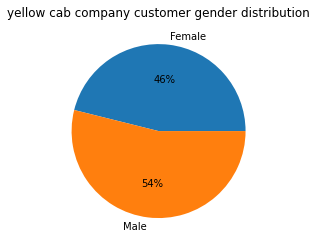

In [110]:
plt.pie(yellow_gender_count,labels =yellow_gender,autopct='%.0f%%')
plt.title("yellow cab company customer gender distribution")
plt.show()

### Result: surprisingly, The gender distribution of male and female students are the same

## <span style="color:red">Hypothesis 3: customer payment method distribution are different between those two cab companies <span style="color:red"> 

In [111]:
## discover the payment method distribution of pink cab company 
pink_payment_count = list(pink_cab_df.groupby(["Payment_Mode"])["Payment_Mode"].count())
pink_payment= list(pink_cab_df.groupby(["Payment_Mode"])["Payment_Mode"].count().index)

In [117]:
pink_payment_count 

[50719, 33992]

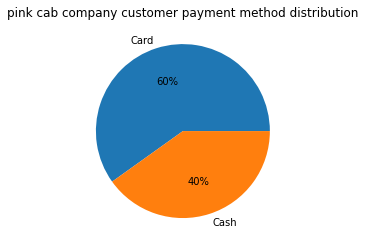

In [114]:
plt.pie(pink_payment_count,labels =pink_payment,autopct='%.0f%%')
plt.title("pink cab company customer payment method distribution")
plt.show()

In [115]:
## discover the payment method distribution of yellow cab company 
yellow_payment_count = list(yellow_cab_df.groupby(["Payment_Mode"])["Payment_Mode"].count())
yellow_payment= list(yellow_cab_df.groupby(["Payment_Mode"])["Payment_Mode"].count().index)

In [118]:
yellow_payment_count

[164785, 109896]

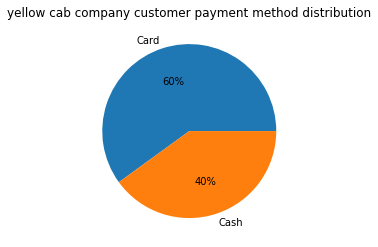

In [116]:
plt.pie(yellow_payment_count,labels =yellow_payment,autopct='%.0f%%')
plt.title("yellow cab company customer payment method distribution")
plt.show()

### Result: surprisingly, the payment method distribution for those two cab company are also the same 

## <span style="color:red">Hypothesis 4: The average price per KM traveled might be different between yellow cab company and pink cab company<span style="color:red"> 

In [122]:
pink_cab_price_df = pink_cab_df[["KM Travelled","Price Charged"]]
pink_cab_price_average = pink_cab_price_df["Price Charged"]/pink_cab_price_df["KM Travelled"]
print(f"the average price for pink cab company is {pink_cab_price_average.mean()}")

the average price for pink cab company is 13.76851000706273


In [123]:
yellow_cab_price_df = yellow_cab_df[["KM Travelled","Price Charged"]]
yellow_cab_price_average = yellow_cab_price_df["Price Charged"]/yellow_cab_price_df["KM Travelled"]
print(f"the average price for yellow cab company is {yellow_cab_price_average.mean()}")

the average price for yellow cab company is 20.306072681788116


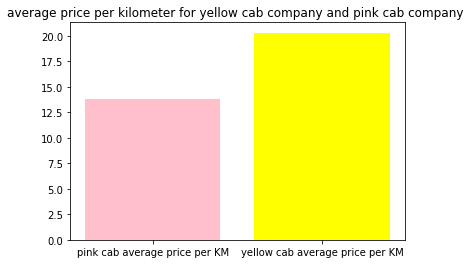

In [133]:
average_price = [pink_cab_price_average.mean(),yellow_cab_price_average.mean()]
labels = ["pink cab average price per KM", "yellow cab average price per KM"]
plt.bar(labels,average_price,color=['pink','yellow'])
plt.title("average price per kilometer for yellow cab company and pink cab company ")
plt.show()

### Result: by comparison, the yellow cab price per Kilometer is more expensive than pink cab price per Kilometer.

## <span style="color:red">Hypothesis 5: Different City have different profit margin for cab companies<span style="color:red"> 

In [134]:
full_df["net_profit"]  = full_df['Price Charged'] - full_df["Cost of Trip"]
full_df

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),net_profit
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656
359388,10439799,12490,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980
359389,10439838,41414,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100
359390,10439840,41677,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600


In [136]:
full_df["profit per KM"] = full_df["net_profit"] /full_df["KM Travelled"]
full_df

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),net_profit,profit per KM
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150,1.882266
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,10.739870
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,4.574571
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660,0.826904
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,6.981330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656,2.837071
359388,10439799,12490,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980,7.660204
359389,10439838,41414,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100,3.747895
359390,10439840,41677,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600,3.903571


In [139]:
pink_df_with_avg_profit = full_df[full_df["Company"]=="Pink Cab"].reset_index(drop=True)
pink_df_with_avg_profit

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),net_profit,profit per KM
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,57.315,1.882266
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,23.666,0.826904
2,10395626,27703,Card,43400,Pink Cab,ATLANTA GA,13.39,167.03,141.934,Male,27,9237,25.096,1.874235
3,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,27.568,3.049558
4,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,25.798,0.777751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84706,10437193,47760,Card,43105,Pink Cab,SACRAMENTO CA,31.03,436.06,344.433,Male,47,8823,91.627,2.952852
84707,10437278,18620,Card,43102,Pink Cab,SAN DIEGO CA,26.73,343.83,304.722,Male,27,2876,39.108,1.463075
84708,10437570,14974,Cash,43105,Pink Cab,SILICON VALLEY,22.23,386.13,264.537,Male,51,8020,121.593,5.469771
84709,10437576,41135,Card,43105,Pink Cab,TUCSON AZ,35.96,461.77,381.176,Female,24,14269,80.594,2.241212


In [145]:
yellow_df_with_avg_profit = full_df[full_df["Company"]=="Yellow Cab"].reset_index(drop=True)
yellow_df_with_avg_profit

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),net_profit,profit per KM
0,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,10.739870
1,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,4.574571
2,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,6.981330
3,10324737,27703,Cash,43224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,Male,27,9237,50.8912,8.234822
4,10079404,28712,Card,42634,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,Male,53,11242,210.0920,5.305354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274676,10439790,38520,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656,2.837071
274677,10439799,12490,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980,7.660204
274678,10439838,41414,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100,3.747895
274679,10439840,41677,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600,3.903571


In [166]:
pink_average_profit = []
pink_city = list(pink_df_with_avg_profit["City"].unique())
for city in pink_city:
    city_profit_avg = pink_df_with_avg_profit[pink_df_with_avg_profit["City"]==city]["profit per KM"].mean()
    pink_average_profit.append(city_profit_avg)

In [167]:
yellow_average_profit = []
yellow_city = list(yellow_df_with_avg_profit["City"].unique())
for city in pink_city:
    city_profit_avg = yellow_df_with_avg_profit[yellow_df_with_avg_profit["City"]==city]["profit per KM"].mean()
    yellow_average_profit.append(city_profit_avg)

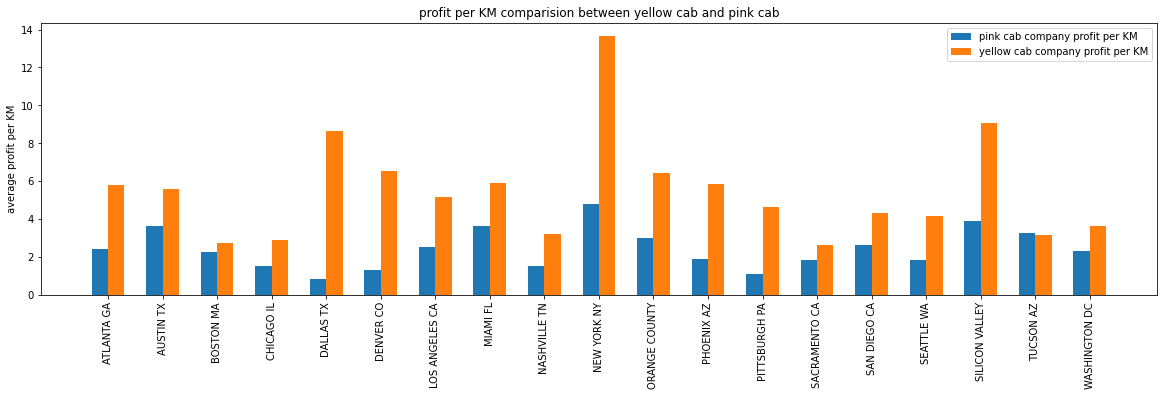

In [178]:
## get the profit per KM comparision between yellow cab and pink cab graph
N = 19
ind = np.arange(N)
width = 0.3
plt.figure(figsize=(20,5))

plt.bar(ind,pink_average_profit,width, label='pink cab company profit per KM')
plt.bar(ind+width,yellow_average_profit,width,label='yellow cab company profit per KM')
plt.ylabel("average profit per KM")

plt.xticks(ind + width / 2,pink_city)
plt.xticks(rotation = 90)
plt.legend(loc='best')
plt.title("profit per KM comparision between yellow cab and pink cab")

plt.show()

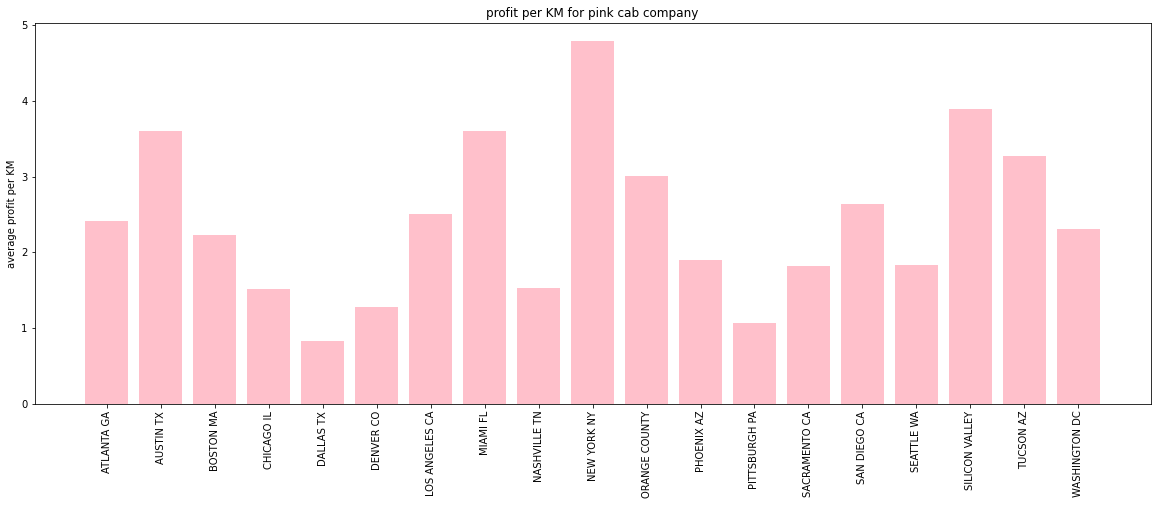

In [180]:
## individual graph: pink cab company 
plt.figure(figsize=(20,7))
plt.bar(pink_city,pink_average_profit,color="pink")
plt.xticks(rotation = 90)
plt.ylabel("average profit per KM")
plt.title("profit per KM for pink cab company")

plt.show()


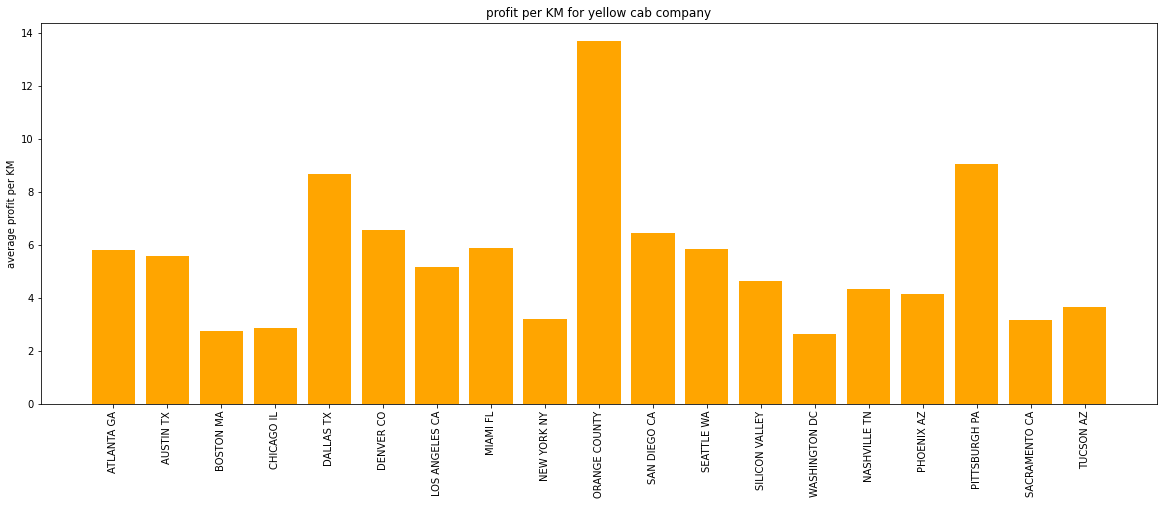

In [182]:
## individual graph: yellow cab company 
plt.figure(figsize=(20,7))
plt.bar(yellow_city,yellow_average_profit,color="orange")
plt.xticks(rotation = 90)
plt.ylabel("average profit per KM")
plt.title("profit per KM for yellow cab company")

plt.show()

### Result: pink cab earn most profit in new york city, silicon valley and Miami. In contrast, yellow cab earn the most in orange county, pittsburgh and dallas. 

## <span style="color:red">Hypothesis 6:Cash payment have bigger profit margin<span style="color:red"> 

In [185]:
cash_transaction_df = full_df[full_df["Payment_Mode"]=="Cash"].reset_index(drop=True)
cash_transaction_df

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),net_profit,profit per KM
0,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,10.739870
1,10324737,27703,Cash,43224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,Male,27,9237,50.8912,8.234822
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,Male,53,11242,27.5680,3.049558
3,10320493,28712,Cash,43211,Yellow Cab,ATLANTA GA,19.38,326.35,272.0952,Male,53,11242,54.2548,2.799525
4,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,Male,23,23327,25.7980,0.777751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143883,10439415,48038,Cash,43104,Yellow Cab,PITTSBURGH PA,23.94,458.23,295.8984,Male,61,23954,162.3316,6.780769
143884,10439419,46512,Cash,43465,Yellow Cab,SACRAMENTO CA,32.67,469.42,466.5276,Male,20,16996,2.8924,0.088534
143885,10439423,45772,Cash,43101,Yellow Cab,SACRAMENTO CA,35.70,498.31,462.6720,Female,60,3169,35.6380,0.998263
143886,10439799,12490,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980,7.660204


In [186]:
card_transaction_df = full_df[full_df["Payment_Mode"]=="Card"].reset_index(drop=True)
card_transaction_df

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),net_profit,profit per KM
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150,1.882266
1,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,4.574571
2,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660,0.826904
3,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,6.981330
4,10395626,27703,Card,43400,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,Male,27,9237,25.0960,1.874235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215499,10439428,46912,Card,43103,Yellow Cab,SACRAMENTO CA,18.72,276.67,242.6112,Male,51,23225,34.0588,1.819380
215500,10439766,36141,Card,43465,Yellow Cab,SEATTLE WA,21.42,342.33,275.0328,Female,21,14944,67.2972,3.141793
215501,10439790,38520,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656,2.837071
215502,10439838,41414,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100,3.747895


In [187]:
#average profit margin for cash payment
avg_profit_per_km_cash = cash_transaction_df["profit per KM"].mean()
avg_profit_per_km_cash

6.096684124146505

In [188]:
#average profit margin for card payment 
avg_profit_per_km_card = card_transaction_df["profit per KM"].mean()
avg_profit_per_km_card

6.074829034539223

### Average profit per km for both card payment and cash payment is about the same

## <span style="color:red">Hypothesis 7: different cab company can have different customer base in different cities.<span style="color:red"> 


In [192]:

yellow_unique_customer_df = yellow_cab_df.drop_duplicates().reset_index(drop=True)
pink_unique_customer_df = pink_cab_df.drop_duplicates().reset_index(drop=True)

In [199]:
#pink cab customer distribution 
pink_city_index = list(pink_unique_customer_df.groupby(["City"])["City"].count().index)
pink_city_count = list(pink_unique_customer_df.groupby(["City"])["City"].count())

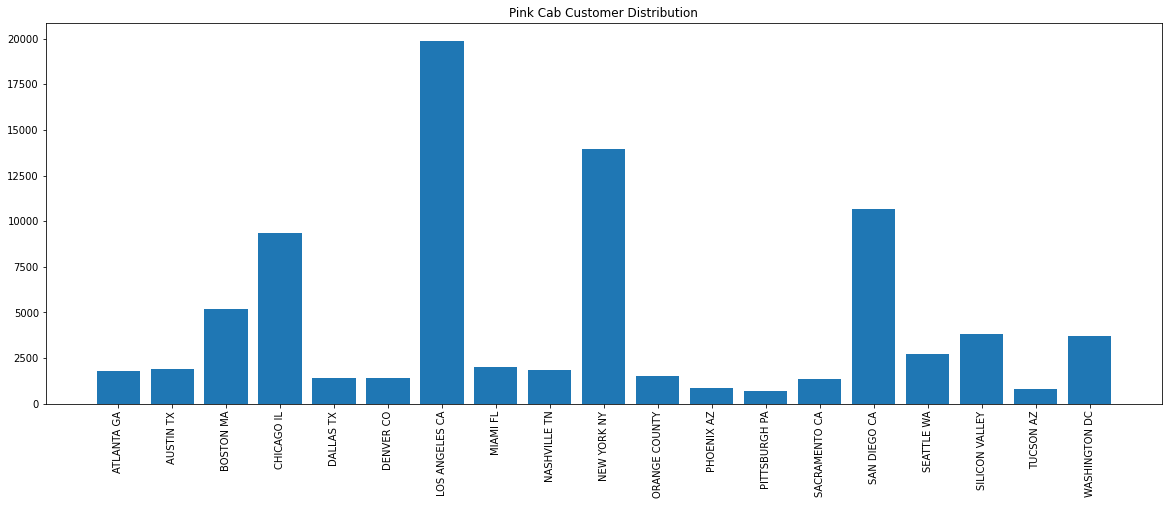

In [203]:
plt.figure(figsize=(20,7))
plt.bar(pink_city_index,pink_city_count)
plt.xticks(rotation = 90)
plt.title("Pink Cab Customer Distribution")
plt.show()

In [201]:
# yellow cab customer distribution 
yellow_city_index = list(yellow_unique_customer_df.groupby(["City"])["City"].count().index)
yellow_city_count = list(yellow_unique_customer_df.groupby(["City"])["City"].count())


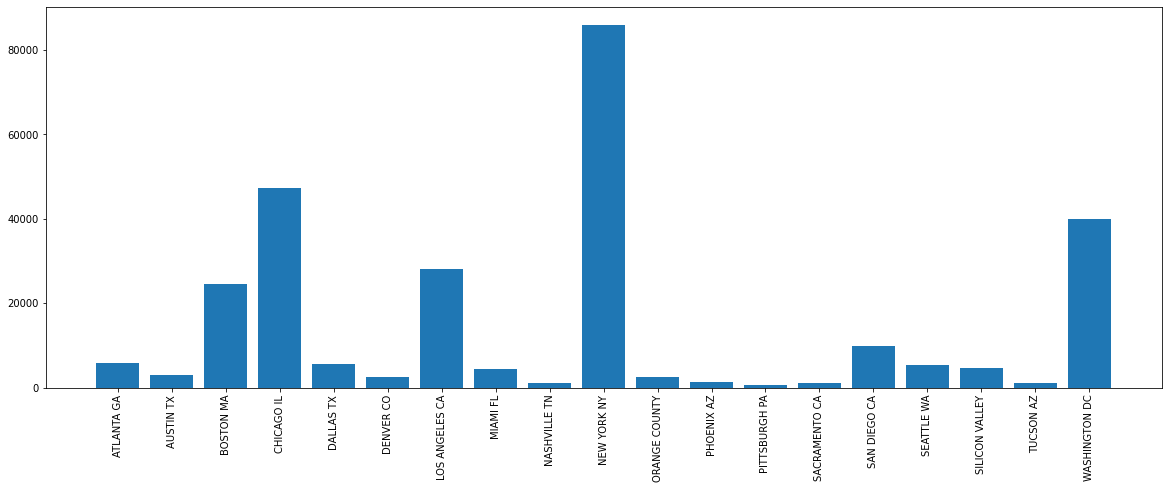

In [202]:
plt.figure(figsize=(20,7))
plt.bar(yellow_city_index,yellow_city_count)
plt.xticks(rotation = 90)
plt.title("Yellow Cab Customer Distribution")
plt.show()

### Result: top 3 customer base for pink cab company is in: New York City, Los Angeles and San Diego. Top 3 customer base for yellow cab company is in: New York City, Chicago and Washington DC